In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('sonar.csv',header=None)

In [5]:
print("Showing First 5 rows of the database")
df.head()

Showing First 5 rows of the database


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
print("Checking null fields in the dataset")
df.isnull().sum()

Checking null fields in the dataset


0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [59]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=0,strategy='mean')

In [7]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

print("Data before using LavelEncoder")
df[60]

Data before using LavelEncoder


0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [8]:
df[60]=le.fit_transform(df[60])
print("Data after using LavelEncoder")
df[60]

Data after using LavelEncoder


0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: 60, Length: 208, dtype: int32

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=df.drop(columns=[60])
y=df[60]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [12]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [13]:
nb.fit(X_train,y_train)

GaussianNB()

In [14]:
nb.score(X_train,y_train)

0.7482014388489209

In [15]:
y_pred = nb.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
print("Confusion Matrix for Naive Bayers")
confusion_matrix(y_test,y_pred)

Confusion Matrix for Naive Bayers


array([[25, 13],
       [ 4, 27]], dtype=int64)

In [19]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.66      0.75        38
           1       0.68      0.87      0.76        31

    accuracy                           0.75        69
   macro avg       0.77      0.76      0.75        69
weighted avg       0.78      0.75      0.75        69



In [21]:
X=df.drop(columns=[60])
y=df[60]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
print("\n\n DECISION TREE CLASSIFIER")
from sklearn import tree
dt = tree.DecisionTreeClassifier()



 DECISION TREE CLASSIFIER


In [28]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
print("Training Score")
dt.score(X_train,y_train)

Training Score


1.0

In [30]:
y_pred_dt = dt.predict(X_test)

In [31]:
print("Classification Report")
print(classification_report(y_test,y_pred_dt))

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        38
           1       0.69      0.71      0.70        31

    accuracy                           0.72        69
   macro avg       0.72      0.72      0.72        69
weighted avg       0.73      0.72      0.72        69



In [34]:
print("Confusion Matrix for Decision Tree")
confusion_matrix(y_test,y_pred_dt)

Confusion Matrix for Decision Tree


array([[28, 10],
       [ 9, 22]], dtype=int64)

In [33]:
nb_probs = nb.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)

In [36]:
dt_probs = dt_probs[:, 1]
nb_probs = nb_probs[:, 1]
nb_probs

array([4.98356036e-07, 9.54602324e-01, 9.99989362e-01, 9.99784288e-01,
       3.78936500e-03, 9.99777540e-01, 1.08743421e-06, 2.35265447e-12,
       9.99997707e-01, 1.47360333e-06, 4.82146622e-05, 9.98250912e-01,
       9.99045259e-01, 4.22034737e-07, 9.53280248e-05, 5.39043717e-01,
       8.62905898e-01, 9.55886010e-01, 4.51840516e-01, 9.99955004e-01,
       1.31225634e-04, 9.98103814e-01, 1.27229062e-05, 3.01787570e-09,
       9.99997940e-01, 9.99999916e-01, 9.99997618e-01, 2.98892463e-02,
       5.52731613e-17, 6.19924503e-08, 9.59861802e-01, 9.99978431e-01,
       9.99999975e-01, 8.74418382e-01, 2.05200183e-30, 4.50971337e-48,
       1.77057717e-17, 9.93801823e-01, 9.93347816e-01, 8.41602360e-01,
       9.99996611e-01, 9.99603381e-01, 9.38335909e-01, 7.02448721e-03,
       9.99999982e-01, 5.29366577e-01, 9.86516940e-01, 9.32274707e-01,
       9.99999889e-01, 9.99999682e-01, 9.99993584e-01, 3.72556351e-02,
       9.52315864e-01, 1.25371387e-08, 9.99202077e-01, 9.91382650e-01,
      

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

In [38]:
nb_auc = roc_auc_score(y_test, nb_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

In [39]:
print('Decision Tree AUROC = ' + str(dt_auc))
print('Naive Bayes AUROC = ' + str(nb_auc))

Decision Tree AUROC = 0.7232597623089984
Naive Bayes AUROC = 0.8904923599320883


In [40]:
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

In [41]:
import matplotlib.pyplot as plt

In [1]:
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

NameError: name 'plt' is not defined

Showing First 5 rows of the database
Checking null fields in the dataset
Data before using LavelEncoder
Data after using LavelEncoder
Confusion Matrix for Naive Bayers
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.66      0.75        38
           1       0.68      0.87      0.76        31

    accuracy                           0.75        69
   macro avg       0.77      0.76      0.75        69
weighted avg       0.78      0.75      0.75        69



 DECISION TREE CLASSIFIER
Training Score
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        38
           1       0.67      0.71      0.69        31

    accuracy                           0.71        69
   macro avg       0.71      0.71      0.71        69
weighted avg       0.71      0.71      0.71        69

Confusion Matrix for Decision Tree
Decision Tree AUROC = 0.7101018675721562
Naive Bayes AUR

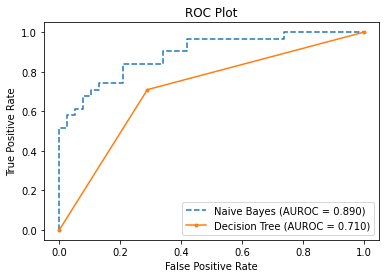

In [6]:
import pandas as pd
df = pd.read_csv('sonar.csv',header=None)
print("Showing First 5 rows of the database")
df.head()

print("Checking null fields in the dataset")
df.isnull().sum()

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

print("Data before using LavelEncoder")
df[60]

df[60]=le.fit_transform(df[60])
print("Data after using LavelEncoder")
df[60]


from sklearn.model_selection import train_test_split

X=df.drop(columns=[60])
y=df[60]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train,y_train)

nb.score(X_train,y_train)

y_pred = nb.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report

print("Confusion Matrix for Naive Bayers")
confusion_matrix(y_test,y_pred)

print("Classification Report")
print(classification_report(y_test,y_pred))

X=df.drop(columns=[60])
y=df[60]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("\n\n DECISION TREE CLASSIFIER")
from sklearn import tree
dt = tree.DecisionTreeClassifier()

dt.fit(X_train,y_train)
print("Training Score")
dt.score(X_train,y_train)

y_pred_dt = dt.predict(X_test)
print("Classification Report")
print(classification_report(y_test,y_pred_dt))

print("Confusion Matrix for Decision Tree")
confusion_matrix(y_test,y_pred_dt)
nb_probs = nb.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)

dt_probs = dt_probs[:, 1]
nb_probs = nb_probs[:, 1]
nb_probs
from sklearn.metrics import roc_curve, roc_auc_score

nb_auc = roc_auc_score(y_test, nb_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

print('Decision Tree AUROC = ' + str(dt_auc))
print('Naive Bayes AUROC = ' + str(nb_auc))

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

import matplotlib.pyplot as plt

plt.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()
